### Import the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from numpy import isnan
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import Birch
from numpy import unique
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tensorflow import keras
import tensorflow as tf

### Read the data

In [ ]:
df1=pd.read_csv('train.csv')


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df1.describe()

In [ ]:
df1.head()

### Handling missing values

In [ ]:
df1.replace(['-9999', -9999], np.nan, inplace=True)
df1

In [ ]:
col_names =list(df1.columns.values[-3:])
df1.dropna(axis=0, subset=col_names, inplace=True)
df1

In [ ]:
corr_matr=df1[1:].corr()
#corr_matr['PHIF'].sort_values(ascending=False)
corr_matr['SW'].sort_values(ascending=False)

In [ ]:
df1.isna().sum()

## Iterative imputer

In [9]:
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
col=['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED','PHIF','SW','VSH']

strategies = ['ascending']#, 'descending', 'roman', 'arabic', 'random']
for s in strategies:
    # create the modeling pipeline
    imputer=IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=25, random_state=100,max_depth=20,"min_samples_leaf":[5]),imputation_order=s)
    # evaluate the model
    #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
df1=df1.loc[:,col]
imputer.fit(df1)
# transform the dataset
df1 = pd.DataFrame(imputer.transform(df1),columns=df1.columns,index=df1.index)
# print total missing
#print('Missing: %d' % sum(isnan(Xtrans)))


C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [ ]:
df1.to_csv('dataset_with_iterativeimputer_ExtraTreesRegressor_25estimators_hyp.csv')


In [10]:
df1=pd.read_csv('dataset_with_iterativeimputer_ExtraTreesRegressor_25estimators_hyp.csv') #on 11 features
#df1=df1.reset_index(drop=True)
#df1=df1.reset_index(drop=True)
df1=df1.drop(columns='Unnamed: 0')
df1

,DEPTH,DTC,DTS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,PHIF,SW,VSH
0,14121.66,89.65,133.56,9.90,2.58,0.10,88.86,0.28,7.50,2.63,2.49,0.00,1.00,0.75
1,14122.16,96.02,132.71,9.99,2.47,0.10,120.89,0.29,6.64,2.48,2.47,0.00,1.00,1.03
2,14122.66,104.05,155.12,9.90,2.33,0.10,153.52,0.45,6.97,2.44,2.37,0.00,1.00,1.31
3,14123.16,113.50,149.99,9.90,2.24,0.10,182.85,0.58,6.76,2.41,2.41,0.00,1.00,1.68
4,14123.66,117.78,153.86,9.81,2.23,0.10,256.20,0.56,6.85,2.34,2.41,0.00,1.00,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42304,12142.50,64.58,111.27,8.55,2.61,0.03,32.92,0.11,5.21,4.08,3.65,0.03,1.00,0.27
42305,12143.00,66.21,111.30,8.52,2.61,0.02,28.77,0.10,5.23,4.12,3.94,0.03,1.00,0.23
42306,12143.50,67.43,113.71,8.52,2.62,0.03,25.70,0.10,5.34,4.66,4.25,0.02,1.00,0.21
42307,12144.00,66.56,110.71,8.52,2.62,0.03,22.94,0.09,5.35,4.81,4.37,0.02,1.00,0.18


### Removing outliers

In [15]:
clf = IsolationForest(random_state=0).fit_predict(df1.iloc[:,:11]) #better
df1_x_train = df1.iloc[:,:11][clf==1]
df1_y_train=df1.iloc[clf==1,[11,12,13]]
df1_y_train

,PHIF,SW,VSH
70,0.00,1.00,0.40
71,0.00,1.00,0.31
72,0.00,1.00,0.27
78,0.07,0.79,0.14
79,0.14,0.33,0.09
...,...,...,...
42304,0.03,1.00,0.27
42305,0.03,1.00,0.23
42306,0.02,1.00,0.21
42307,0.02,1.00,0.18


In [16]:
#df1_x_train=df1_x_train[df1_x_train.loc[:,'PEF'] != min(df1_x_train.loc[:,'PEF'])]
#sns.pairplot(pd.concat([df1_x_train,df1_y_train.loc[:,'VSH']],axis=1))

### CORRELATION

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GR', ylabel='VSH'>

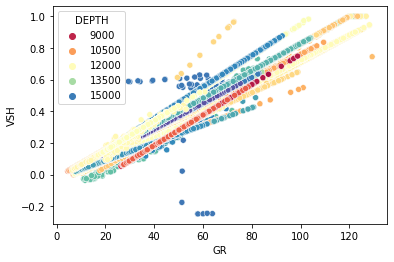

In [17]:
sns.scatterplot(df1_x_train.loc[:,'GR'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'DEPTH'],palette='Spectral')
#plt.xlim((40,60))
#plt.ylim((0.2,0.5))

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GR', ylabel='DEPTH'>

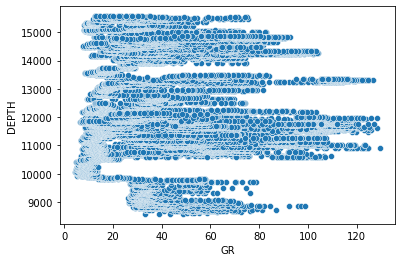

In [18]:
sns.scatterplot(df1_x_train.loc[:,'GR'],df1_x_train.loc[:,'DEPTH'],palette='Spectral')

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DEPTH', ylabel='VSH'>

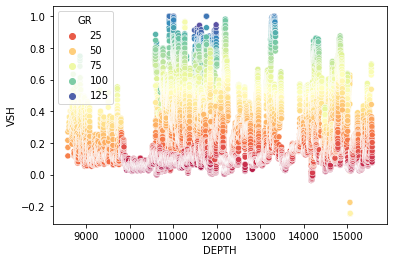

In [19]:
sns.scatterplot(df1_x_train.loc[:,'DEPTH'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'GR'],palette='Spectral')

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 6.0)

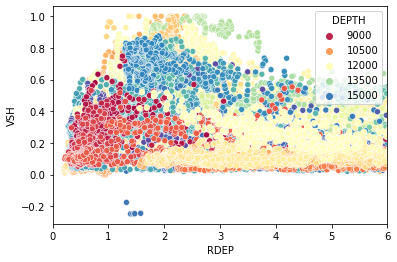

In [20]:
sns.scatterplot(df1_x_train.loc[:,'RDEP'], df1_y_train.loc[:,'VSH'],hue=df1_x_train.loc[:,'DEPTH'],palette='Spectral')
plt.xlim((0,6))
#plt.ylim((0.4,0.5))

In [101]:
#df1_x_train.loc[:,'GR'].shape , df1_y_train.loc[:,'VSH'].shape

### Scaling the data

In [21]:
scaler=StandardScaler()
df1_x_train=pd.DataFrame(scaler.fit_transform(df1_x_train),columns=df1_x_train.columns,index=df1_x_train.index)

In [22]:
df1_x_train.describe()

,DEPTH,DTC,DTS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED
count,38680.00,38680.00,38680.00,38680.00,38680.00,38680.00,38680.00,38680.00,38680.00,38680.00,38680.00
mean,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.40,-2.94,-4.04,-1.91,-3.57,-5.86,-1.45,-2.56,-3.28,-0.19,-0.05
25%,-0.68,-0.65,-0.54,-0.48,-0.94,-0.51,-0.83,-0.58,-0.34,-0.17,-0.05
50%,-0.24,0.11,0.14,-0.09,0.07,0.07,-0.16,-0.04,0.15,-0.15,-0.05
75%,0.67,0.84,0.79,0.18,0.88,0.62,0.50,0.62,0.57,-0.08,-0.04
max,2.16,4.51,3.84,14.25,3.12,9.87,3.85,5.21,5.18,67.03,45.23


### Split the dataset

In [23]:
# Here, we separate train and test data by wells
ns = int(df1_x_train.shape[0]*80/100)
X_train, X_val = df1_x_train[:ns], df1_x_train[ns:]
y_train, y_val = df1_y_train[:ns], df1_y_train[ns:]

# # if you want to separate train and test data randomly
# # please remember to use random_state for all randomization steps, this will ensure we get the same results 
# # as yours during the validation phase. 
# X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=100)

### Train the model

In [24]:

def grid_search(clf, param_grid, X_train=X_train, y_train=y_train,ht='random'):
    """
    Fits a classifier to its training data and prints its ROC AUC score.
    
    INPUT:
    - clf (classifier): classifier to fit
    - param_grid (dict): classifier parameters used with GridSearchCV
    - X_train (DataFrame): training input
    - y_train (DataFrame): training output
            
    OUTPUT:
    - classifier: input classifier fitted to the training data
    """
    # cv uses StratifiedKFold
    # scoring r2 as parameter
    if ht=='random':
        grid = RandomizedSearchCV(estimator=clf, 
                            param_distributions=param_grid, 
                            scoring='r2',n_iter=50,
                            cv=5)
    else:
        grid = GridSearchCV(estimator=clf, 
                            param_grid=param_grid, 
                            scoring='r2', 
                            cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_score_)
    print(grid.best_estimator_)
    return grid.best_estimator_

In [25]:

def result_plot(y_predict, y_real, n_points=1000):
    names = ['PHIF', 'SW', 'VSH']
    RMSE, R2 = [], []
    
    for i,name in enumerate(names):
        RMSE.append(np.sqrt(mean_squared_error(y_real.iloc[:,i], y_predict.iloc[:,i])))
        R2.append(r2_score(y_real.iloc[:,i], y_predict.iloc[:,i]))
    
    # check the accuracy of predicted data and plot the result
    print('RMSE:', '{:.5f}'.format(np.sqrt(mean_squared_error(y_real, y_predict))))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {RMSE[i]:.5f}')
#     print("-"*65)
    
    print( 'R^2: ', r2_score(y_real, y_predict))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {R2[i]:.5f}')
    
    plt.subplots(nrows=3, ncols=2, figsize=(16,16))

    for i,name in enumerate(names):       
        plt.subplot(3, 2, i*2+1)
        plt.plot(y_real.iloc[:n_points, i])
        plt.plot(y_predict.iloc[:n_points, i])
        plt.legend(['True', 'Predicted'])
        plt.xlabel('Sample')
        plt.ylabel(name)
        plt.title(name+' Prediction Comparison')

        plt.subplot(3, 2, i*2+2)
        plt.scatter(y_real.iloc[:, i], y_predict.iloc[:, i], alpha=0.01)
        plt.xlabel('Real Value')
        plt.ylabel('Predicted Value')
        plt.title(name+' Prediction Comparison')
    
    plt.show()



In [26]:
y_pred_clusts=pd.DataFrame()
y_true_clusts=pd.DataFrame()

y_pred_clust=[1,2,3]
y_true_clust=[2,3,4]

pd.concat([y_pred_clusts,pd.Series(y_pred_clust)],axis=1)
#pd.concat([y_true_clusts,pd.Series(y_true_clust)],axis=1)

,0
0,1
1,2
2,3


In [170]:
from numpy.random import seed
seed(80)

tf.random.set_seed(79)
reg = GradientBoostingRegressor(random_state=100)
rf=RandomForestRegressor(n_estimators=100, random_state=100)
exreg = ExtraTreesRegressor(n_estimators=100, random_state=100)
adreg= AdaBoostRegressor(n_estimators=100, random_state=100)
lr=LinearRegression()
poly=PolynomialFeatures(degree=2,include_bias=False)
n_clust=1
if n_clust > 1:
    birch = Birch(threshold=0.01, n_clusters=n_clust)
    # fit the model
    birch.fit(X_train)
    # assign a cluster to each example
    yhat = birch.predict(X_train)
    # retrieve unique clusters
    clusters = unique(yhat)
    #for cluster in clusters:
    #    # get row indexes for samples with this cluster
    #    row_ix = where(yhat == cluster)
    names=['PHIF', 'SW']+[range(n_clust)]
    names
    #reg_best = grid_search(reg, {})
    yhat_val = birch.predict(X_val)

    clusts=[]
    clusts_val=[]


    for i in range(n_clust):
        clust=np.where(yhat==i)
        clusts.append(clust) # dataframes nested into a list

        clust_val=np.where(yhat_val==i)
        clusts_val.append(clust_val)
    #reg = GradientBoostingRegressor(n_estimators=100, random_state=100)
    clusters=[]
    cluster_instances=[]
    true=pd.DataFrame([])
    pred=pd.DataFrame([])


    clusters_val=[]
    cluster_instances_val=[]
    true_val=pd.DataFrame([])
    pred_val=pd.DataFrame([])


    for c,cval,i in zip(clusts,clusts_val,range(n_clust)):
        ind=c[0]
        target='SW'
        cluster_instance=y_train[target].iloc[ind]
        cluster_instances.append(cluster_instance)
        if i==0:
            reg_best_target = grid_search(exreg, {},X_train.iloc[ind],y_train[target].iloc[ind])
        else:  
            reg_best_target = grid_search(exreg, {},X_train.iloc[ind],y_train[target].iloc[ind])
        clust_results=reg_best_target.predict(X_train.iloc[ind])
        clusters.append(clust_results.tolist())
        pred=pd.concat([pred,pd.Series(clust_results)],axis=0)
        true=pd.concat([true,y_train[target].iloc[ind]],axis=0)
        #cross_validation
        ind_val=cval[0]
        if ind_val.size:
            cluster_instance_val=y_val[target].iloc[ind_val]
            cluster_instances_val.append(cluster_instance_val)
            clust_results_val=reg_best_target.predict(X_val.iloc[ind_val])
            clusters_val.append(clust_results_val.tolist())
            pred_val=pd.concat([pred_val,pd.Series(clust_results_val)],axis=0)
            true_val=pd.concat([true_val,y_val[target].iloc[ind_val]],axis=0)
    
      
else:
 
    

    from tensorflow.keras import layers
    opt = keras.optimizers.Adam(learning_rate=0.0000055, beta_1=0.92,beta_2=0.88,epsilon=1e-08,amsgrad='False')
    model=keras.models.Sequential([keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.05),
                                   keras.layers.Dense(6220,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.07),
                                   keras.layers.Dense(3200,activation='elu',
                                                      kernel_initializer='glorot_normal',
                                                   #  ,kernel_regularizer=keras.regularizers.l2(0.02)
                                                     ),
                                   keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.05),
                                   keras.layers.Dense(84,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   #keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.21),
                                   keras.layers.Dense(1,activation='sigmoid')])
    #model.summary()
    model.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])
    import os
    root_logdir=os.path.join(os.curdir,'my_logs')
    def get_run_logdir():
        import time
        run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
        return os.path.join(root_logdir,run_id)
    run_logdir=get_run_logdir()
    tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
    #checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model',save_best_only=True)
    early_stopping_cb=keras.callbacks.EarlyStopping(patience=48,restore_best_weights=True)
    
    history=model.fit(np.array(X_train),np.array(y_train['VSH']),
    epochs=2000,validation_data=(X_val,y_val['VSH']),
                     callbacks=[early_stopping_cb])
'''     
param_grid={"max_depth" : [5],
           "min_samples_leaf":[1],
           "min_weight_fraction_leaf":[0.0],
           "max_features":["auto"],
           "max_leaf_nodes":[8] ,
               'n_estimators': [120]}
reg_best_VSH = grid_search(reg, param_grid,X_train, y_train.loc[:,'VSH'],ht='notrandom')






opt = keras.optimizers.Adam(learning_rate=0.000006, beta_1=0.9,beta_2=0.98,epsilon=1e-08,amsgrad='False')
model2=keras.models.Sequential([keras.layers.BatchNormalization(),
                                   keras.layers.Dropout(rate=0.1),
                                   keras.layers.Dense(1850,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   #keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.07),
                                   #keras.layers.Dense(1000,activation='elu',
                                                   #   kernel_initializer='glorot_normal',
                                                   #  ,kernel_regularizer=keras.regularizers.l2(0.02)
                                                     #),
                                   keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.05),
                                   keras.layers.Dense(30,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   #keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.21),
                                   keras.layers.Dense(1,activation='sigmoid')])
#model.summary()
#model2.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])
import os
root_logdir=os.path.join(os.curdir,'my_logs')
def get_run_logdir():
    import time
    run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)
run_logdir=get_run_logdir()
#tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model_2_layers_1_iterative_imp_modelSW.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=66,restore_best_weights=True)

history=model2.fit(np.array(X_train),np.array(y_train['SW']),
    epochs=1,validation_data=(X_val,y_val['SW']),
                     callbacks=[checkpoint_cb,early_stopping_cb])'''

#param = {'max_depth': 6, 'eta': 0.3}
#param = {'max_depth': [2,4,6,8],'nthread':4}

#param['eval_metric'] = 'auc'

#dtrain = xgb.DMatrix(X_train, label=y_train['SW'])
#dval = xgb.DMatrix(X_val, label=y_val['SW'])
#param['eval_metric'] = ['auc', 'ams@0']

# alternatively:
# plst = param.items()
# plst += [('eval_metric', 'ams@0')]
#Specify validations set to watch performance

#evallist = [(dval, 'eval'), (dtrain, 'train')]
#num_round = 10
#bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=80)



#reg_xgb.best_score, reg_xgb.best_iteration

Epoch 1/2000
967/967 [==============================] - 55s 55ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 2/2000
967/967 [==============================] - 53s 55ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 3/2000
967/967 [==============================] - 53s 55ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 4/2000
967/967 [==============================] - 54s 55ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 5/2000
967/967 [==============================] - 54s 56ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 6/2000
967/967 [==============================] - 53s 54ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoc

967/967 [==============================] - 8s 9ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 100/2000
967/967 [==============================] - 9s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 101/2000
967/967 [==============================] - 8s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 102/2000
967/967 [==============================] - 8s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 103/2000
967/967 [==============================] - 9s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 104/2000
967/967 [==============================] - 8s 9ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 105/2000
967/

'     \nparam_grid={"max_depth" : [5],\n           "min_samples_leaf":[1],\n           "min_weight_fraction_leaf":[0.0],\n           "max_features":["auto"],\n           "max_leaf_nodes":[8] ,\n               \'n_estimators\': [120]}\nreg_best_VSH = grid_search(reg, param_grid,X_train, y_train.loc[:,\'VSH\'],ht=\'notrandom\')\n\n\n\n\n\n\nopt = keras.optimizers.Adam(learning_rate=0.000006, beta_1=0.9,beta_2=0.98,epsilon=1e-08,amsgrad=\'False\')\nmodel2=keras.models.Sequential([keras.layers.BatchNormalization(),\n                                   keras.layers.Dropout(rate=0.1),\n                                   keras.layers.Dense(1850,activation=\'elu\'\n                                                      ,kernel_initializer=\'glorot_normal\'\n                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)\n                                                     ),\n                                   #keras.layers.BatchNormalization(),\n           

In [179]:


opt = keras.optimizers.Adam(learning_rate=0.000003, beta_1=0.9,beta_2=0.99,epsilon=1e-08,amsgrad='False')
model2=keras.models.Sequential([keras.layers.BatchNormalization(),
                                   keras.layers.Dropout(rate=0.1),
                                   keras.layers.Dense(2020,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   #keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.07),
                                   #keras.layers.Dense(1000,activation='elu',
                                                      #kernel_initializer='glorot_normal',
                                                     #,kernel_regularizer=keras.regularizers.l2(0.02)
                                                     #),
                                   keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.05),
                                   keras.layers.Dense(1044,activation='elu'
                                                      ,kernel_initializer='glorot_normal'
                                                     #,kernel_regularizer=keras.regularizers.l2(0.1)
                                                     ),
                                   #keras.layers.BatchNormalization(),
                                   #keras.layers.Dropout(rate=0.21),
                                   keras.layers.Dense(1,activation='sigmoid')])
#model.summary()
model2.compile(loss='mean_squared_error', optimizer=opt, metrics=[tf.keras.metrics.MeanSquaredError()])
import os
root_logdir=os.path.join(os.curdir,'my_logs')
def get_run_logdir():
    import time
    run_id=time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)
run_logdir=get_run_logdir()
#tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model_2_layers_1_iterative_imp_modelSW.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=66,restore_best_weights=True)

history=model2.fit(np.array(X_train),np.array(y_train['SW']),
    epochs=1000,validation_data=(X_val,y_val['SW']),
                     callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/1000
967/967 [==============================] - 4s 4ms/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.1091 - val_mean_squared_error: 0.1091
Epoch 2/1000
967/967 [==============================] - 3s 4ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.1135 - val_mean_squared_error: 0.1135
Epoch 3/1000
967/967 [==============================] - 3s 3ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 4/1000
967/967 [==============================] - 3s 3ms/step - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.1155 - val_mean_squared_error: 0.1155
Epoch 5/1000
967/967 [==============================] - 3s 3ms/step - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0896 - val_mean_squared_error: 0.0896
Epoch 6/1000
967/967 [==============================] - 3s 3ms/step - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.1157 - val_mean_squared_error: 0.1157
Epoch 7/1000
967

KeyboardInterrupt: 

In [296]:
'''reg_xgb=xgb.XGBRegressor(seed=100,max_depth=2,reg_lambda=6,subsample=0.6,learn_rate=0.001
                        , booster='dart',tree_method='exact',gamma=0.02,learning_rate=0.220000012
                        ,n_estimators=100,n_jobs=36,num_parallel_tree=3,colsample_bynode=1
                        ,min_child_weight=3,random_state=100,base_score=0.6,#reg_alpha=0.1
                        )
reg_xgb.fit(X_train,y_train.loc[:,'SW'],early_stopping_rounds=6,eval_set=[(X_val,y_val.loc[:,'SW'])],
          )
          '''
#SW  GradientBoostingRegressor(max_depth=8, max_features='auto', max_leaf_nodes=9,
            #n_estimators=80, random_state=100)
param_grid={"max_depth" : [280],
            #"min_samples_leaf":[4],
            'learning_rate': [0.12],
            "min_samples_leaf":[5],
            'tol': [0.0001],
            #'min_impurity_decrease':[0.3],
            #"min_weight_fraction_leaf":[0.0],
            "max_features":['auto'],
            "max_leaf_nodes":[8] ,
            'n_iter_no_change':[3],
            #'min_impurity_decrease':[0.3],
            #'warm_start':['True'],
            #'criterion':['squared_error'],
               'n_estimators': [80]}  


reg_best_SW = grid_search(reg,param_grid,X_train, y_train.loc[:,'SW'],ht='nonrandom')
a=reg_best_SW.predict(X_val)
mean_squared_error(y_val.loc[:,'SW'], a)

0.9486132425797559
GradientBoostingRegressor(learning_rate=0.12, max_depth=280,
                          max_features='auto', max_leaf_nodes=8,
                          min_samples_leaf=5, n_estimators=80,
                          n_iter_no_change=3, random_state=100)


0.006823667388730339

In [ ]:
0.007434668229190597

0.007433637721274822

0.006823667388730339

In [273]:
reg_best_SW

GradientBoostingRegressor(learning_rate=0.12, max_depth=280,
                          max_features='auto', max_leaf_nodes=8,
                          min_samples_leaf=5, n_estimators=80,
                          n_iter_no_change=3, random_state=100)

In [283]:
reg_best_SW.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.12,
 'loss': 'ls',
 'max_depth': 280,
 'max_features': 'auto',
 'max_leaf_nodes': 8,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_iter_no_change': 3,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': 'True'}

In [312]:
#max_depth=10, min_samples_leaf=2, n_estimators=80
param_grid={#"max_depth" : [100],
              'bootstrap': [False],
            "min_samples_leaf":[6],
           "min_weight_fraction_leaf":[0.0],
            "max_features":["auto"],
            "max_leaf_nodes":[6000] ,
               'n_estimators': [80]
          #'bootstrap': [True, False]
           }   
reg_best_PHIF = grid_search(exreg,param_grid,X_train, y_train.loc[:,'PHIF'],ht='nonrandom')
a=reg_best_PHIF.predict(X_val)
mean_squared_error(y_val.loc[:,'PHIF'], a)

0.9589663725534642
ExtraTreesRegressor(max_leaf_nodes=6000, min_samples_leaf=6, n_estimators=80,
                    random_state=100)


0.00021892892784828124

In [ ]:
0.00021892892784828124

In [303]:
reg_best_PHIF.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 6000,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

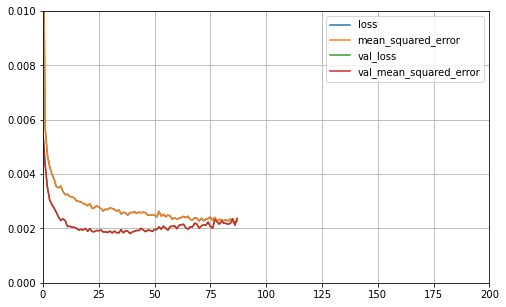

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_xlim(0,200)
plt.gca().set_ylim(0,0.01)
model.save('my_keras_model_iterativeimp_110.h5')

In [313]:
#model=keras.models.load_model('my_keras_model_iterativeimp_110.h5') #best model for VSH
#model.summary()
#model=keras.models.load_model('my_keras_model_iterativeimp.h5') #best model for VSH
#model.summary()
model=keras.models.load_model('my_keras_model_iterativeimp_107.h5') 
model.summary()
#model2=keras.models.load_model('my_keras_model_SW_2.h5') 
#model2.summary()
#to visualize activation functions
for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model.layers)):
    print(f'{i}   {model.layers[i]}: \n{model.layers[i].get_config()} \n')
#info about optimizers
model.optimizer.get_config()        

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_86 (Batc (None, 11)                44        
_________________________________________________________________
dense_122 (Dense)            (None, 6220)              74640     
_________________________________________________________________
batch_normalization_87 (Batc (None, 6220)              24880     
_________________________________________________________________
dense_123 (Dense)            (None, 3200)              19907200  
_________________________________________________________________
batch_normalization_88 (Batc (None, 3200)              12800     
_________________________________________________________________
dense_124 (Dense)            (None, 84)                268884    
_________________________________________________________________
dense_125 (Dense)            (None, 1)               

{'name': 'Adam',
 'learning_rate': 5.5e-06,
 'decay': 0.0,
 'beta_1': 0.92,
 'beta_2': 0.88,
 'epsilon': 1e-08,
 'amsgrad': 'False'}

### Predict on validation dataset

RMSE: 0.03007
    PHIF  : 0.00513
    SW    : 0.03897
    VSH   : 0.03419
R^2:  0.9844920805518879
    PHIF  : 0.99528
    SW    : 0.98846
    VSH   : 0.96974


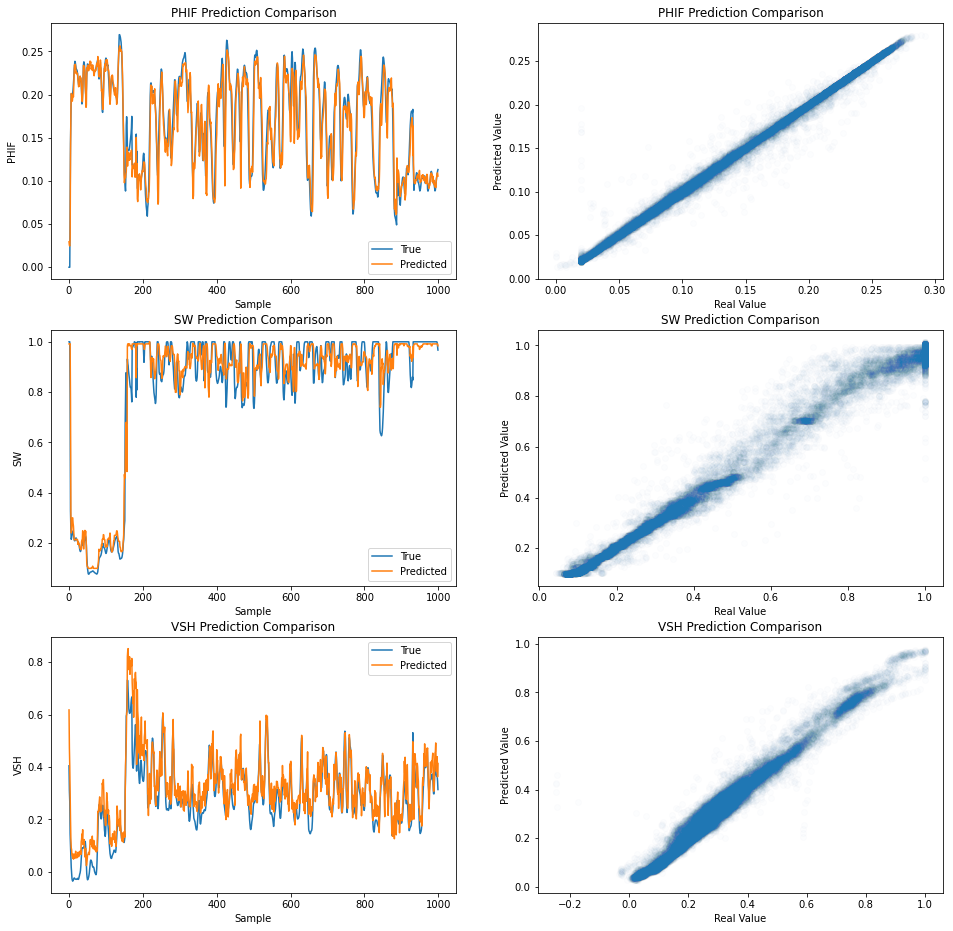

RMSE: 0.05368
    PHIF  : 0.01480
    SW    : 0.08261
    VSH   : 0.04001
R^2:  0.865858043953895
    PHIF  : 0.97203
    SW    : 0.69608
    VSH   : 0.92946


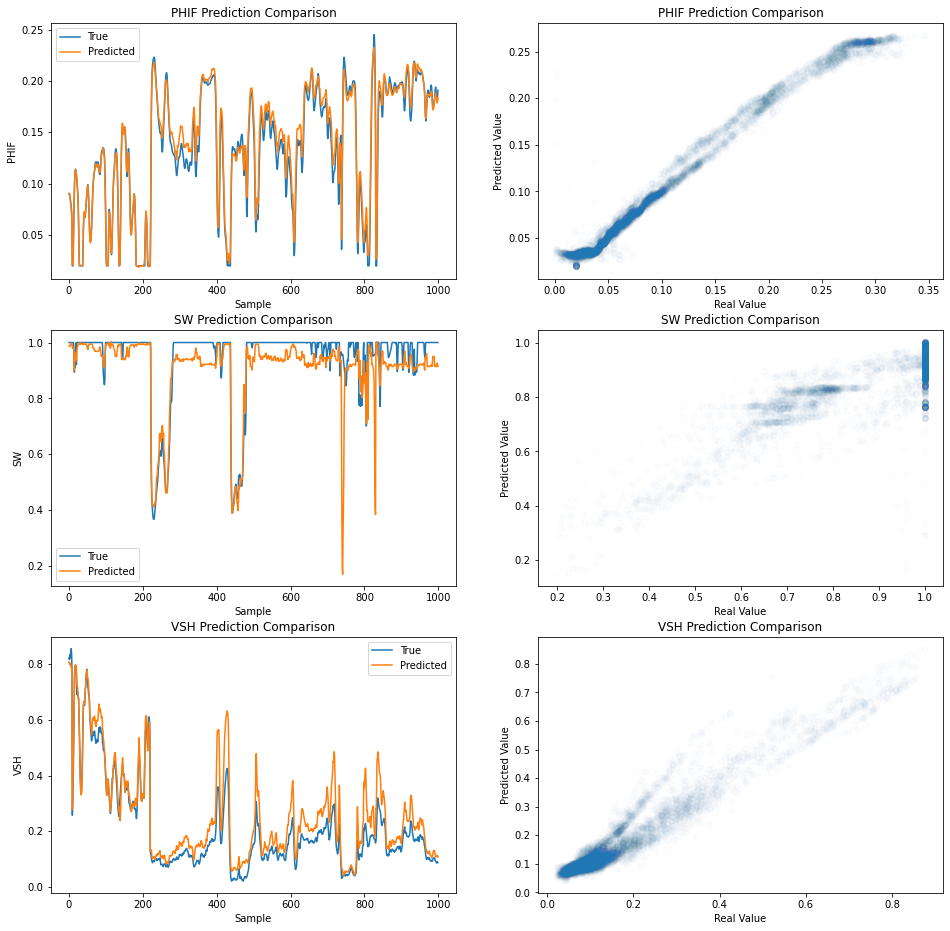

true:         0    1    2
0     0.00 1.00 0.40
1     0.00 1.00 0.31
2     0.00 1.00 0.27
3     0.07 0.79 0.14
4     0.14 0.33 0.09
...    ...  ...  ...
30939 0.11 1.00 0.81
30940 0.11 1.00 0.80
30941 0.10 1.00 0.81
30942 0.10 1.00 0.81
30943 0.09 1.00 0.83

[30944 rows x 3 columns]
pred:         0    1             2
0     0.03 0.99   [0.6181885]
1     0.03 0.99   [0.4748792]
2     0.02 0.99  [0.40360892]
3     0.03 0.99   [0.2967359]
4     0.13 0.77  [0.20257443]
...    ...  ...           ...
30939 0.11 0.98   [0.8172382]
30940 0.11 0.97   [0.8099331]
30941 0.10 0.97   [0.8061112]
30942 0.10 0.99   [0.8028027]
30943 0.09 0.99  [0.81131136]

[30944 rows x 3 columns]
true:        0    1    2
0    0.09 1.00 0.82
1    0.09 1.00 0.82
2    0.09 1.00 0.83
3    0.09 1.00 0.82
4    0.08 1.00 0.84
...   ...  ...  ...
7731 0.03 1.00 0.27
7732 0.03 1.00 0.23
7733 0.02 1.00 0.21
7734 0.02 1.00 0.18
7735 0.03 1.00 0.17

[7736 rows x 3 columns]
pred:        0    1             2
0    0.09 0.99   [0.80

In [314]:
if n_clust >1:
    y_predict=pd.DataFrame([reg_best_PHIF.predict(X_train),pred.values.flatten(),
                            model.predict(X_train)]).T#clusters
                  #reg_best_VSH.predict(X_train)
    y_true=pd.DataFrame([y_train['PHIF'].values.tolist(),true.values.flatten(),y_train['VSH'].values.tolist()]).T#+ cluster_instances
    
    y_predict_val=pd.DataFrame([reg_best_PHIF.predict(X_val),pred_val.values.flatten()
                               ,model.predict(X_val)]).T#clusters
              #reg_best_VSH.predict(X_train)
    y_true_val=pd.DataFrame([y_val['PHIF'].values.tolist(),true_val.values.flatten(),y_val['VSH'].values.tolist()]).T
else:
    y_predict=pd.DataFrame([reg_best_PHIF.predict(X_train),
                            reg_best_SW.predict(X_train),model.predict(X_train)]).T#clusters
                  #reg_best_VSH.predict(X_train)
    y_true=pd.DataFrame([y_train['PHIF'].values.tolist(),y_train['SW'].values.tolist(),y_train['VSH'].values.tolist()]).T#+ cluster_instances
    
    y_predict_val=pd.DataFrame([reg_best_PHIF.predict(X_val),
                        reg_best_SW.predict(X_val),model.predict(X_val)]).T#clusters
              #reg_best_VSH.predict(X_train)
    y_true_val=pd.DataFrame([y_val['PHIF'].values.tolist(),y_val['SW'].values.tolist(),y_val['VSH'].values.tolist()]).T
    
    
result_plot(y_predict, y_true)#,names=['PHIF', 'SW',list(range(n_clust))])
result_plot(y_predict_val, y_true_val)

print(f'true:{y_true}')
print(f'pred:{y_predict}')

print(f'true:{y_true_val}')
print(f'pred:{y_predict_val}')

In [268]:
#RMSE: 0.06607
 #   PHIF  : 0.01802
 #   SW    : 0.09536
 #   VSH   : 0.06065
#R^2:  0.7971471242216017
#    PHIF  : 0.95852
#    SW    : 0.59497
#    VSH   : 0.83795




#RMSE: 0.06279
 #   PHIF  : 0.01802
 #   SW    : 0.09536
  #  VSH   : 0.04909
#R^2:  0.8157747115641495
 #   PHIF  : 0.95852
  #  SW    : 0.59497
   # VSH   : 0.89383

    
#RMSE: 0.05876
    #PHIF  : 0.01553
    #SW    : 0.08780
    #VSH   : 0.04909
#R^2:  0.8399021175140038
   # PHIF  : 0.96920
    #SW    : 0.65668
   # VSH   : 0.89383
    
RMSE: 0.06453
    PHIF  : 0.01553
    SW    : 0.09920
    VSH   : 0.04909
R^2:  0.8082335766723862
    PHIF  : 0.96920
    SW    : 0.56167
    VSH   : 0.89383
    
    
    
RMSE: 0.06445
    PHIF  : 0.01553
    SW    : 0.09920
    VSH   : 0.04879
R^2:  0.8086612828420324
    PHIF  : 0.96920
    SW    : 0.56167
    VSH   : 0.89512    
        
        
102
RMSE: 0.06425
    PHIF  : 0.01553
    SW    : 0.09920
    VSH   : 0.04796
R^2:  0.8098414143968964
    PHIF  : 0.96920
    SW    : 0.56167
    VSH   : 0.89866    

103
RMSE: 0.06463
    PHIF  : 0.01553
    SW    : 0.09920
    VSH   : 0.04950
R^2:  0.8076432142116777
    PHIF  : 0.96920
    SW    : 0.56167
    VSH   : 0.89206   
        
        
RMSE: 0.06413
    PHIF  : 0.01553
    SW    : 0.09920
    VSH   : 0.04751
R^2:  0.8104740482706582
    PHIF  : 0.96920
    SW    : 0.56167
    VSH   : 0.90055        
        
RMSE: 0.06370
    PHIF  : 0.01553
    SW    : 0.09920
    VSH   : 0.04573
R^2:  0.8129090106564751
    PHIF  : 0.96920
    SW    : 0.56167
    VSH   : 0.90786        
        
        
RMSE: 0.06241
    PHIF  : 0.01553
    SW    : 0.09920
    VSH   : 0.04001
R^2:  0.8201098130609701
    PHIF  : 0.96920
    SW    : 0.56167
    VSH   : 0.92946        

RMSE: 0.05986
    PHIF  : 0.01566
    SW    : 0.09172
    VSH   : 0.04573
R^2:  0.8339392854996469
    PHIF  : 0.96867
    SW    : 0.62529
    VSH   : 0.90786        
        
RMSE: 0.05560
    PHIF  : 0.01540
    SW    : 0.08622
    VSH   : 0.04001
R^2:  0.8560149442290944
    PHIF  : 0.96972
    SW    : 0.66886
    VSH   : 0.92946
        
        
        RMSE: 0.05556
    PHIF  : 0.01498
    SW    : 0.08622
    VSH   : 0.04001
R^2:  0.8565508143796822
    PHIF  : 0.97133
    SW    : 0.66886
    VSH   : 0.92946
        
        
RMSE: 0.05537
    PHIF  : 0.01498
    SW    : 0.08587
    VSH   : 0.04001
R^2:  0.857463741265402
    PHIF  : 0.97133
    SW    : 0.67160
    VSH   : 0.92946        

RMSE: 0.05368
    PHIF  : 0.01480
    SW    : 0.08261
    VSH   : 0.04001
R^2:  0.865858043953895
    PHIF  : 0.97203
    SW    : 0.69608
    VSH   : 0.92946        
        
        

NameError: name 'reg_best_VSH' is not defined

In [315]:
# load test data
df2 = pd.read_csv('test.csv')

# Replace missing value -9999 with np.nan
df2.replace(['-9999', -9999], np.nan, inplace=True)

df2.describe()

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP
count,11275.00,11275.00,10614.00,3911.00,11275.00,11275.00,11193.00,11193.00,11275.00,11271.00,11193.00,11198.00,11198.00,6394.00
mean,102.01,12643.58,81.92,146.65,8.53,8.53,2.41,0.03,65.90,0.21,4.14,32.27,35.85,44.89
std,1.64,2516.27,11.36,15.44,0.31,0.19,0.15,0.03,56.26,0.08,1.43,265.81,301.75,56.58
min,100.00,10177.50,48.28,98.21,8.50,8.25,1.33,-0.10,3.99,0.04,1.55,0.10,0.10,3.02
25%,100.00,10869.50,74.20,138.00,8.50,8.36,2.27,0.00,30.11,0.16,3.08,1.74,1.70,24.82
50%,101.00,11343.00,82.69,145.53,8.50,8.51,2.45,0.02,53.77,0.20,3.90,2.86,2.76,25.05
75%,104.00,16034.25,88.91,158.38,8.50,8.65,2.54,0.04,94.25,0.24,5.02,8.18,7.88,44.09
max,104.00,17443.50,125.39,190.26,12.25,9.31,3.20,0.19,1711.42,0.73,15.14,5000.00,5000.00,300.11


In [316]:
test_data = np.array(df2.loc[:,['DEPTH', 'DTC', 'DTS', 'CALI', 'DEN', 'DENC', 'GR', 'NEU', 'PEF',
        'RDEP', 'RMED']])

# Imputation transformer for completing missing values.
imp_mean = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=25, random_state=100))
test_data = imp_mean.fit_transform(test_data)

# standardize testing data
X_test = scaler.transform(test_data)

C:\Users\diego\anaconda3\envs\env1_cloned_tf\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [317]:
test_predict = np.array([reg_best_PHIF.predict(X_test), #reg_best_SW
                        reg_best_SW.predict(X_test),model.predict(X_test).flatten()]).T
test_predict

array([[0.07809108, 0.95655174, 0.10460468],
       [0.09371826, 0.91983666, 0.11449566],
       [0.09929917, 0.85976848, 0.1117909 ],
       ...,
       [0.14465817, 0.90881142, 0.19624497],
       [0.15035803, 0.89215644, 0.18291819],
       [0.15998763, 0.87283158, 0.17580795]])

In [318]:
# Replace team_name and num_submit
team_name = 'Iron486'
num_submit = 2

# Please don't change codes below
N_SAMPLES = 11275
n_sub_dict = {1:1, 2:2, 3:3}

# Check submission number is correct
try:
    n_sub = n_sub_dict[num_submit]
except KeyError:
    print(f"ERROR!!! Submission Number must be in 1, 2 or 3")

# Check number of samples are correct
if test_predict.shape[0] != N_SAMPLES:
    raise ValueError(f"Number of samples {test_predict.shape[0]} doesn't matches with the correct value {N_SAMPLES}")

# Write results to csv file
output_result = pd.DataFrame({col_names[-3]:test_predict[:,0], col_names[-2]:test_predict[:,1], col_names[-1]:test_predict[:,2]})
output_result.to_csv(path_or_buf=f'./{team_name}_{n_sub}.csv', index=False)

In [26]:
GradientBoostingRegressor(max_depth=25, max_features='auto', max_leaf_nodes=11,
                          min_samples_leaf=5, n_estimators=90,
                          random_state=100)



GradientBoostingRegressor(max_depth=30, max_features='auto', max_leaf_nodes=11,
                          min_samples_leaf=4, n_estimators=80,
                          random_state=100)

ExtraTreesRegressor(max_depth=10, min_samples_leaf=4, n_estimators=80,
                    random_state=100)

validation_0-rmse:0.08886
(0.087797, 45)




(0.088362, 24)  [31]	validation_0-rmse:0.08967


[30]	validation_0-rmse:0.08989

validation_0-rmse:0.09412










#clusters
#0.8880181261319564
#GradientBoostingRegressor(random_state=100)

#0.7903002049805667
#GradientBoostingRegressor(random_state=100)
#0.8471938017199369
#GradientBoostingRegressor(random_state=100)

#0.916426274438758
#ExtraTreesRegressor(random_state=100)

#0.8889443823201869
#ExtraTreesRegressor(random_state=100)

#0.8932950845418978
#ExtraTreesRegressor(random_state=100)





#0.9451350016974331
#GradientBoostingRegressor(random_state=100)
#0.955063671641087
#ExtraTreesRegressor(random_state=100)

In [ ]:
#RMSE: 0.06232
   # PHIF  : 0.01712
   # SW    : 0.09459
   # VSH   : 0.04909
#R^2:  0.8192951806777787
  #  PHIF  : 0.96255
   # SW    : 0.60150
  #  VSH   : 0.89383
    
#50 estimators iterimputer
#MSE: 0.06279
 #   PHIF  : 0.01802
  #  SW    : 0.09536
  #  VSH   : 0.04909
#R^2:  0.8157747115641495
  #  PHIF  : 0.95852
   # SW    : 0.59497
    #VSH   : 0.89383    

    
   # 15
# RMSE: 0.06279
  #  PHIF  : 0.01802
  #  SW    : 0.09536
#    VSH   : 0.04909
#R^2:  0.8157747115641495
   # PHIF  : 0.95852
  #  SW    : 0.59497
 #   VSH   : 0.89383   
    
#RMSE: 0.06679
 #   PHIF  : 0.01780
  #  SW    : 0.10323
  #  VSH   : 0.04909
#R^2:  0.7929210451345013
  #  PHIF  : 0.95955
  #  SW    : 0.52538
  #  VSH   : 0.89383    

In [ ]:
# check the result on validation dataset only
'''yhat_val = model.predict(X_val)
clusters_val = unique(yhat_val)
clusts_val=[]
for i in range(n_clust):
    clust_val=np.where(yhat_val==i)
    clusts_val.append(clust_val) # dataframes nested into a list
    #print(clusts_val)
for c in clusts_val:
    try:
        #print(X_val.iloc[c])
         #reg_best = grid_search(reg, {},X_train.iloc[c],y_train.iloc[c])
        result_plot(reg_best.predict(X_val.iloc[c]), y_val.iloc[c])
    except ValueError:
        continue
    except IndexError:
        continue'''

#gradient boosting
#0.23764 isolation forest, iterative inputer k=8
#0.067 k=11 isolation forest, iterative inputer
#0.08297 k=12 isolation forest, iterative inputer
#0.04202 k=11 no automatic filling missing values, isolation forest    
#0.05562 k=11 no automatic filling missing values, isolation forest , 3 clusters on VSH feature
#0.07920 k=11 no aut filling, isolation forest , 3 clusters on VSH feature, extratrees first cluster
#0.05768 k=11 no aut filling, isolation forest , 3 clusters on VSH feature, adaboost first cluster


# 0.06588 k=11 no automatic filling missing values, isolation forest , ExtraTrees VSH feature
# 0.04201 k=11 no automatic filling missing values, isolation forest , ExtraTrees PHIF feature 
#0.05880 k=11 no automatic filling missing values, isolation forest , ExtraTrees PHIF and SW feature 
#0.04282 k=11 no aut filling, isolation forest , ExtraTrees PHIF, adaboost VSH feature 
#0.06766 k=11 no aut filling, isolation forest , ExtraTrees PHIF, adaboost SW feature 
# 0.04114 no automatic filling missing values, isolation forest , ExtraTrees PHIF feature                                
#VSH GradientBoostingRegressor(max_depth=5, max_features='auto', max_leaf_nodes=8,  
                          #min_samples_leaf=2, n_estimators=110,min_weight_fraction_leaf= 0.0,
                          #random_state=100)
#0.04023  no automatic filling missing values, isolation forest , ExtraTrees PHIF feature      
#VSH GradientBoostingRegressor(max_depth=5, max_features='auto', max_leaf_nodes=8,
#                          n_estimators=120, random_state=100)       
        


#no automatic filling missing values, isolation forest , ExtraTrees PHIF feature 
#RMSE: 0.03838
   # PHIF  : 0.00498
   # SW    : 0.03477
   # VSH   : 0.05643
#R^2:  0.9507901801163379
 #   PHIF  : 0.99239
 #   SW    : 0.92284
 #   VSH   : 0.93714
#VSH  GradientBoostingRegressor(max_depth=5, max_features='auto', max_leaf_nodes=8,
     #  n_estimators=120, random_state=100)

# PHIF ExtraTreesRegressor(random_state=100)

#  SW  GradientBoostingRegressor(max_depth=8, max_features='auto', max_leaf_nodes=9,
            #n_estimators=80, random_state=100)
 
 #no automatic filling missing values, isolation forest , ExtraTrees PHIF feature    
#RMSE: 0.03782
   # PHIF  : 0.00498
    #SW    : 0.03477
   # VSH   : 0.05530
#R^2:  0.9516247800858518
  #  PHIF  : 0.99239
  #  SW    : 0.92284
  #  VSH   : 0.93965 

#VSH #learning_rate=0.0000014 Adam, elu, glorot, 950_50 ,BatchNorm

# PHIF ExtraTreesRegressor(random_state=100)

#  SW  GradientBoostingRegressor(max_depth=8, max_features='auto', max_leaf_nodes=9,
            #n_estimators=80, random_state=100) 

#RMSE: 0.03622
  #  PHIF  : 0.00498
  #  SW    : 0.03477
  #  VSH   : 0.05198
#R^2:  0.9539654169255757
  #  PHIF  : 0.99239
  #  SW    : 0.92284
  #  VSH   : 0.94667
#VSH #learning_rate=0.0000014 Adam, elu, glorot, 1250_50 ,BatchNorm

    

#RMSE: 0.03424
#    PHIF  : 0.00488
#    SW    : 0.03416
#    VSH   : 0.04823
#R^2:  0.9574370087896602
#    PHIF  : 0.99270
#    SW    : 0.92554
#    VSH   : 0.95408
#VSH #learning_rate=0.0000014 Adam, beta_1=0.9,beta_2=0.98,epsilon=1e-08,
#elu, glorot, 1250_50 ,BatchNorm    
#GradientBoostingRegressor(max_depth=7, max_features='auto', max_leaf_nodes=9,
                         # random_state=120)    
# ExtraTreesRegressor(max_depth=10,n_estimators=300)   

                          
#'my_keras_model_13bis_best.h5'    
    
#RMSE: 0.03356
 #   PHIF  : 0.00488
 #   SW    : 0.03416
 #   VSH   : 0.04678
#R^2:  0.9583468874779874
#    PHIF  : 0.99270
#    SW    : 0.92554
 #   VSH   : 0.95681    
#VSH #learning_rate=0.0000024 Adam, beta_1=0.9,beta_2=0.98,epsilon=1e-08, amsgrad='False'
#elu, glorot, 1250_50 ,BatchNorm    
#SW GradientBoostingRegressor(max_depth=7, max_features='auto', max_leaf_nodes=9,
                         # random_state=120)    
#PHIF ExtraTreesRegressor(max_depth=10,n_estimators=300)   
  


    

#0.04302  k=10 no authomatic filling missing values, isolation forest
#0.04404 k=12 no authomatic filling missing values, isolation forest

#0.08  k=11,clusters=11 no authomatic filling missing values, isolation forest
#0.088  k=20,clusters=11 no authomatic filling missing values, isolation forest

#0.08296 k=12
#0.08144 k=10
#ridge_regression 0.132


### Predict the test dataset

In [14]:
df2=pd.read_csv('test.csv')
df2

,WELLNUM,DEPTH,DTC,DTS,BS,CALI,DEN,DENC,GR,NEU,PEF,RDEP,RMED,ROP
0,100,15912.50,65.46,-9999.00,8.50,8.28,2.55,0.05,9.79,0.13,5.86,2.88,2.65,262.28
1,100,15913.00,64.57,-9999.00,8.50,8.28,2.52,0.04,11.28,0.11,6.02,2.88,2.65,262.04
2,100,15913.50,64.44,-9999.00,8.50,8.28,2.51,0.04,9.95,0.11,6.06,3.03,2.93,261.99
3,100,15914.00,65.03,-9999.00,8.50,8.28,2.58,0.06,8.63,0.11,6.20,3.05,2.97,261.72
4,100,15914.50,65.13,-9999.00,8.50,8.29,2.55,0.02,7.31,0.12,5.18,3.05,2.97,261.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11270,104,12393.50,-9999.00,-9999.00,8.50,8.51,2.42,0.04,35.40,0.14,3.15,0.82,0.85,22.95
11271,104,12394.00,-9999.00,-9999.00,8.50,8.49,2.42,0.04,35.71,0.14,3.20,0.75,0.79,22.78
11272,104,12394.50,-9999.00,-9999.00,8.50,8.50,2.41,0.04,33.68,0.14,3.27,0.71,0.70,22.67
11273,104,12395.00,-9999.00,-9999.00,8.50,8.51,2.40,0.04,32.26,0.15,3.21,0.72,0.68,22.41


In [15]:
df2.isna().sum()

WELLNUM    0
DEPTH      0
DTC        0
DTS        0
BS         0
CALI       0
DEN        0
DENC       0
GR         0
NEU        0
PEF        0
RDEP       0
RMED       0
ROP        0
dtype: int64

In [ ]:
%history 